# TP régression lineare en python
## EYA NASRI
## 4ERP-BI 2

### Objectif: Il s’agit de prédire le prix de biens immobiliers en fonction d’informations concernant l’environnement en utilisant le dataset BOSTON. On va Predire le MEDV (- Median value of owner-occupied homes in 1000's dollar ) selon les autres variables

In [94]:
#Chargement des bibliothèques
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [61]:
#Chargement des données
boston = pd.read_csv('boston.csv')
boston.head()  

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [62]:
boston.shape

(506, 13)

In [63]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [64]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [65]:
# afficher les noms des variables explicatives (“feature”) 
boston.columns

Index(['CRIM', ' ZN ', 'INDUS ', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'LSTAT', 'MEDV'],
      dtype='object')

# Régression linéaire simple
#### Dans un premier temps, nous estimons le prix d'une maison 
#### en utilisant une seule variable soit 'RM'

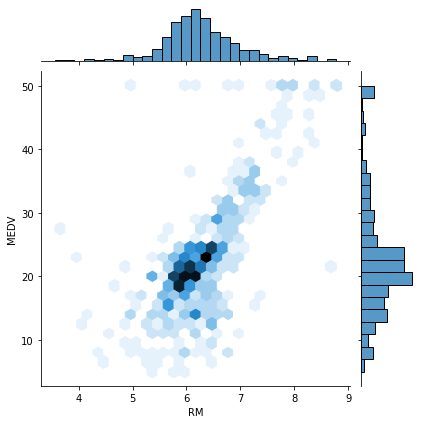

In [95]:
sns.jointplot(boston['RM'],boston['MEDV'],kind='hex')


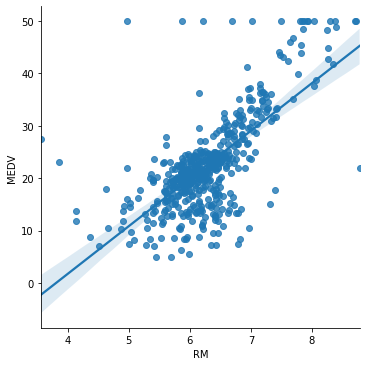

In [91]:
sns.lmplot(x='RM',y ='MEDV', data=boston)


In [66]:
X = boston[['RM']]
y = boston[['MEDV']]
print(X.shape)
print(X.shape)

(506, 1)
(506, 1)


In [67]:
# chargement du modèle LinearRegression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [68]:
#Créer une instance linreg1 
linreg1 = LinearRegression()
#Entrainer linreg1 avec les sous-ensembles d'apprentissage puis caluler le test_score de linreg1
# Entrainer le modèle 
linreg1.fit(X_train, y_train)
#Aficcher l'intercept de linreg1
linreg1.intercept_
#Afficher les coefficients de linreg1
linreg1.coef_

array([[9.01161594]])

In [69]:
#Evaluation de la prédiction
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
y_pred = linreg1.predict(X_test)
print('test_score = ',linreg1.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

test_score =  0.5721625318143688
R2 =  0.5721625318143688
MAE =  35.40560537877825
RMSE =  5.950260950477571
MAE =  4.365257521734308
MeadianAE =  3.2136662246741805


In [70]:
#Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
R2Adj = 1-(1-r2_score(y_test, y_pred))*(506-1)/(506-1-1)
print('R2 Adjusted = ',R2Adj)

R2 Adjusted =  0.5713136479489211


Text(0.5, 1.0, 'Actuals vs Regression Line')

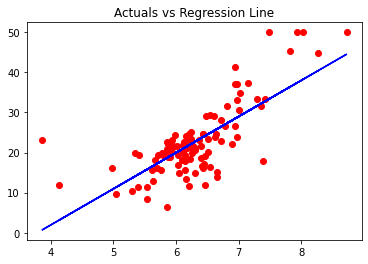

In [71]:
#Plot Our Actual and Predicted Values
plt.plot(X_test, y_test, 'o', color='red');
plt.plot(X_test,y_pred,color='blue')
plt.title("Actuals vs Regression Line")

In [72]:
import statsmodels.api as sm
est = sm.OLS(y_test, X_test)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.912
Method:                 Least Squares   F-statistic:                              1052.
Date:                Sun, 08 May 2022   Prob (F-statistic):                    3.28e-55
Time:                        10:48:00   Log-Likelihood:                         -347.27
No. Observations:                 102   AIC:                                      696.5
Df Residuals:                     101   BIC:                                      699.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### F-statistique est très grande et indique que l’hypothèse d’avoir tous les coefficients nuls est rejetée.
#### La valeur de Durbin Watson est 2, ainsi, il n’a pas d’autocorrélation entre les erreurs.

 # Régression linéaire multiple

In [73]:
X = boston.drop('MEDV', axis=1)
y = boston[['MEDV']]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=3)

In [74]:
#Régression linéaire multiple (toutes les variables de Boston) 
linreg2 = LinearRegression(fit_intercept= True, normalize=False) 
#pour imposer une ordonnée à l'origine (Par défaut ='True')
# Normalisation des données normalize=True
linreg2.fit(X_train, y_train)
y_pred = linreg2.predict(X_test)

print('test_score = ',linreg2.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('MeadianAE = ', median_absolute_error(y_test, y_pred))

print('Intercept = ', linreg2.intercept_)
print('Coefficients : ',linreg2.coef_)

test_score =  0.7939670979504745
R2 =  0.7939670979504745
MAE =  17.05021221246785
RMSE =  4.129190261112686
MAE =  3.0141402036070444
MeadianAE =  2.1899292923264397
Intercept =  [41.71801439]
Coefficients :  [[-1.36030883e-01  4.91228973e-02 -5.71075834e-02  3.58328502e+00
  -1.65787614e+01  3.37070733e+00 -5.89271816e-03 -1.49182712e+00
   2.79551096e-01 -1.10632713e-02 -8.87534865e-01 -5.13568824e-01]]


Text(0, 0.5, 'Residual')

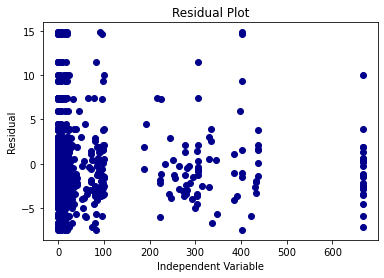

In [75]:
residuals = y_test-y_pred
plt.plot(X_test,residuals, 'o', color='darkblue')
plt.title("Residual Plot")
plt.xlabel("Independent Variable")
plt.ylabel("Residual")

In [76]:
import statsmodels.api as sm
est1 = sm.OLS(y_test, X_test)
est2 = est1.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.970
Method:                 Least Squares   F-statistic:                              274.3
Date:                Sun, 08 May 2022   Prob (F-statistic):                    2.52e-65
Time:                        10:48:03   Log-Likelihood:                         -286.52
No. Observations:                 102   AIC:                                      597.0
Df Residuals:                      90   BIC:                                      628.5
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### F-statistique est très grande et indique que l’hypothèse d’avoir tous les coefficients nuls est rejetée.
### La valeur de Durbin Watson est 2, ainsi, il n’a pas d’autocorrélation entre les erreurs.
### Il y a plusieurs variables qui ne sont pas significatives dans l’établissement de la droite de régression, nous pouvons alors les éliminer (nous gardons ceux qui possèdent p-value<0.05).

# Sélection de variables

In [83]:
# Define the X (inputs) and y (target) features
X = boston.drop("MEDV", axis=1)
y = boston["MEDV"]

In [84]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)

(404, 12)
(102, 12)


In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif      
from sklearn.feature_selection import f_regression  
#Score function:
#For regression: f_regression, mutual_info_regression
#For classification: chi2, f_classif, mutual_info_classif

kbest = SelectKBest(score_func=f_regression, k=3)
kbest.fit(X_train, y_train)
print("Sélection de variables :", kbest.get_support())
print("Scores de variables :", kbest.scores_)
print("Variables sélectionnées:", list(X.columns[kbest.get_support()]))
print("Variables supprimées :", list(X.columns[~kbest.get_support()]))

Sélection de variables : [False False  True False False  True False False False False False  True]
Scores de variables : [ 69.32607475  61.471421   134.32222259  25.30149275  89.893855
 344.39434272  73.80483069  27.27794661  63.59031524 108.45903872
 129.00041566 467.16420955]
Variables sélectionnées: ['INDUS ', 'RM', 'LSTAT']
Variables supprimées : ['CRIM', ' ZN ', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO']


In [87]:
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('test_score = ',model.score(X_test,y_test)) 
print('R2 = ',r2_score(y_test, y_pred))
print('MAE = ',mean_squared_error(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))
print('MAE = ', mean_absolute_error(y_test, y_pred))
print('Meadian = ', median_absolute_error(y_test, y_pred))

test_score =  0.7019405174428994
R2 =  0.7019405174428994
MAE =  24.665853749491585
RMSE =  4.966472968766827
MAE =  3.709885123876638
Meadian =  3.102422130966522


In [ ]:
# normalized residuals pour le QQ-plot
model_norm_residuals=fit1.get_influence().resid_studentized_internal
from statsmodels.

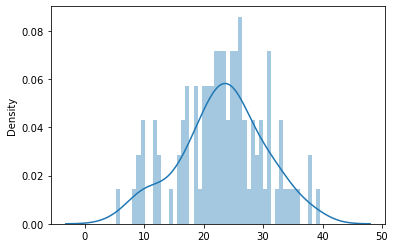

In [97]:
sns.distplot((y_pred),bins=50);
